In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from cycler import cycler
import seaborn as sns
from NFL_Functions import *

In [2]:
# Read in the two datasets
team_stats = pd.read_csv('team_stats_2003_2023.csv')
pos_salaries = pd.read_excel('salary_by_position.xlsx')

In [3]:
# Begin with inspecting and cleaning of the team_stats DataFrame
team_stats.head()

,year,team,wins,losses,win_loss_perc,points,points_opp,points_diff,mov,g,...,penalties,penalties_yds,pen_fd,score_pct,turnover_pct,exp_pts_tot,ties,made_playoffs,playoff_wins,sb_wins
0,2003,New England Patriots,14,2,0.875,348,238,110,6.9,16,...,111,998,26,27.9,11.3,-136.51,NaN,NaN,NaN,NaN
1,2003,Miami Dolphins,10,6,0.625,311,261,50,3.1,16,...,103,913,22,28.1,17.2,-177.92,NaN,NaN,NaN,NaN
2,2003,Buffalo Bills,6,10,0.375,243,279,-36,-2.3,16,...,106,891,22,21.9,17.6,-230.07,NaN,NaN,NaN,NaN
3,2003,New York Jets,6,10,0.375,283,299,-16,-1.0,16,...,69,550,15,32.4,11.8,-107.89,NaN,NaN,NaN,NaN
4,2003,Baltimore Ravens,10,6,0.625,391,281,110,6.9,16,...,126,970,23,31.8,16.6,-220.50,NaN,NaN,NaN,NaN


In [4]:
team_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 672 entries, 0 to 671
Data columns (total 38 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   year                  672 non-null    int64  
 1   team                  672 non-null    object 
 2   wins                  672 non-null    int64  
 3   losses                672 non-null    int64  
 4   win_loss_perc         672 non-null    float64
 5   points                672 non-null    int64  
 6   points_opp            672 non-null    int64  
 7   points_diff           672 non-null    int64  
 8   mov                   352 non-null    float64
 9   g                     672 non-null    int64  
 10  total_yards           672 non-null    int64  
 11  plays_offense         672 non-null    int64  
 12  yds_per_play_offense  672 non-null    float64
 13  turnovers             672 non-null    int64  
 14  fumbles_lost          672 non-null    int64  
 15  first_down            6

In [5]:
# Filter the dataset to keep all years after and including 2011
filtered_stats = team_stats[team_stats['year'] >= 2011]

filtered_stats.head()

,year,team,wins,losses,win_loss_perc,points,points_opp,points_diff,mov,g,...,penalties,penalties_yds,pen_fd,score_pct,turnover_pct,exp_pts_tot,ties,made_playoffs,playoff_wins,sb_wins
256,2011,New England Patriots,13,3,0.813,513,342,171,10.7,16,...,87,815,30,47.2,8.3,99.08,NaN,1.0,2.0,0.0
257,2011,New York Jets,8,8,0.500,377,363,14,0.9,16,...,102,849,36,29.6,13.8,-156.90,NaN,0.0,0.0,0.0
258,2011,Miami Dolphins,6,10,0.375,329,313,16,1.0,16,...,85,779,32,32.8,12.8,-126.50,NaN,0.0,0.0,0.0
259,2011,Buffalo Bills,6,10,0.375,372,434,-62,-3.9,16,...,86,743,33,31.2,15.9,-104.05,NaN,0.0,0.0,0.0
260,2011,Baltimore Ravens,12,4,0.750,378,266,112,7.0,16,...,92,742,33,35.5,11.8,-72.94,NaN,1.0,1.0,0.0


In [6]:
# List of columns to keep
keep_cols = ['year', 'team', 'win_loss_perc', 'made_playoffs', 'playoff_wins', 'sb_wins']

# Filter the dataset to keep only necessary columns for particular analysis
filtered_stats = filtered_stats.filter(items=keep_cols)

filtered_stats.head()

,year,team,win_loss_perc,made_playoffs,playoff_wins,sb_wins
256,2011,New England Patriots,0.813,1.0,2.0,0.0
257,2011,New York Jets,0.500,0.0,0.0,0.0
258,2011,Miami Dolphins,0.375,0.0,0.0,0.0
259,2011,Buffalo Bills,0.375,0.0,0.0,0.0
260,2011,Baltimore Ravens,0.750,1.0,1.0,0.0


In [7]:
# Columns to convert to integer data type
num_cols = ['made_playoffs', 'playoff_wins', 'sb_wins']

# Convert columns to integer data type
for col in num_cols:
    filtered_stats[col] = filtered_stats[col].astype('int64')

filtered_stats.head()

,year,team,win_loss_perc,made_playoffs,playoff_wins,sb_wins
256,2011,New England Patriots,0.813,1,2,0
257,2011,New York Jets,0.500,0,0,0
258,2011,Miami Dolphins,0.375,0,0,0
259,2011,Buffalo Bills,0.375,0,0,0
260,2011,Baltimore Ravens,0.750,1,1,0


In [8]:
filtered_stats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 416 entries, 256 to 671
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           416 non-null    int64  
 1   team           416 non-null    object 
 2   win_loss_perc  416 non-null    float64
 3   made_playoffs  416 non-null    int64  
 4   playoff_wins   416 non-null    int64  
 5   sb_wins        416 non-null    int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 22.8+ KB


In [9]:
# Inspect for NaN values
filtered_stats[filtered_stats.isnull().any(axis=1)]

,year,team,win_loss_perc,made_playoffs,playoff_wins,sb_wins


In [10]:
# Check the 'year' column
filtered_stats['year'].describe()

count     416.000000
mean     2017.000000
std         3.746163
min      2011.000000
25%      2014.000000
50%      2017.000000
75%      2020.000000
max      2023.000000
Name: year, dtype: float64

In [11]:
# Call the 'convert_team_name' function to change names to desired format
filtered_stats['team'] = filtered_stats['team'].apply(convert_team_name)

filtered_stats.head()

,year,team,win_loss_perc,made_playoffs,playoff_wins,sb_wins
256,2011,Patriots,0.813,1,2,0
257,2011,Jets,0.500,0,0,0
258,2011,Dolphins,0.375,0,0,0
259,2011,Bills,0.375,0,0,0
260,2011,Ravens,0.750,1,1,0


In [12]:
filtered_stats['team'].nunique()

32

In [13]:
print(filtered_stats['team'].unique())

['Patriots' 'Jets' 'Dolphins' 'Bills' 'Ravens' 'Steelers' 'Bengals'
 'Browns' 'Texans' 'Titans' 'Jaguars' 'Colts' 'Broncos' 'Chargers'
 'Raiders' 'Chiefs' 'Giants' 'Eagles' 'Cowboys' 'Commanders' 'Packers'
 'Lions' 'Bears' 'Vikings' 'Saints' 'Falcons' 'Panthers' 'Buccaneers'
 '49Ers' 'Cardinals' 'Seahawks' 'Rams']


In [14]:
# Check the 'win_loss_perc' column
filtered_stats['win_loss_perc'].describe()

count    416.000000
mean       0.500260
std        0.189404
min        0.000000
25%        0.375000
50%        0.500000
75%        0.630500
max        0.938000
Name: win_loss_perc, dtype: float64

In [15]:
# Check on the outlier of 0.00 win loss percentage
print(filtered_stats[filtered_stats['win_loss_perc'] == 0.00])

     year    team  win_loss_perc  made_playoffs  playoff_wins  sb_wins
455  2017  Browns            0.0              0             0        0


In [16]:
# Check the 'made_playoffs' column
filtered_stats['made_playoffs'].describe()

count    416.000000
mean       0.391827
std        0.488746
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: made_playoffs, dtype: float64

In [17]:
# Ensure the correct number of teams are marked as making the playoffs for each year, accounting for the shift from 12 to 14 in 2020

# Group by year and sum the 'made_playoffs' column
playoff_counts = filtered_stats.groupby('year')['made_playoffs'].sum().reset_index()

# Validate the number of teams making the playoffs
playoff_counts['expected_playoff_teams'] = playoff_counts['year'].apply(lambda x: 14 if x >= 2020 else 12)

# Add validation check to see if the counts match the expected number
playoff_counts['is_correct'] = playoff_counts['made_playoffs'] == playoff_counts['expected_playoff_teams']

print(playoff_counts)

    year  made_playoffs  expected_playoff_teams  is_correct
0   2011             12                      12        True
1   2012             12                      12        True
2   2013             12                      12        True
3   2014             12                      12        True
4   2015             11                      12       False
5   2016             12                      12        True
6   2017             12                      12        True
7   2018             12                      12        True
8   2019             12                      12        True
9   2020             14                      14        True
10  2021             14                      14        True
11  2022             14                      14        True
12  2023             14                      14        True


In [18]:
# Filter for teams that made the playoffs
playoff_teams = filtered_stats[filtered_stats['made_playoffs'] == 1]

# Group by year and get a list of teams that made the playoffs each year
playoff_teams_by_year = playoff_teams.groupby('year')['team'].apply(list).reset_index()

# Display the list
for index, row in playoff_teams_by_year.iterrows():
    print(f'Year {row["year"]}: {", ".join(row["team"])}')

Year 2011: Patriots, Ravens, Steelers, Bengals, Texans, Broncos, Giants, Packers, Lions, Saints, Falcons, 49Ers
Year 2012: Patriots, Ravens, Bengals, Texans, Colts, Broncos, Commanders, Packers, Vikings, Falcons, 49Ers, Seahawks
Year 2013: Patriots, Bengals, Colts, Broncos, Chiefs, Chargers, Eagles, Packers, Panthers, Saints, Seahawks, 49Ers
Year 2014: Patriots, Steelers, Bengals, Ravens, Colts, Broncos, Cowboys, Packers, Lions, Panthers, Seahawks, Cardinals
Year 2015: Patriots, Bengals, Steelers, Texans, Broncos, Commanders, Vikings, Packers, Panthers, Cardinals, Seahawks
Year 2016: Patriots, Dolphins, Steelers, Texans, Chiefs, Raiders, Cowboys, Giants, Packers, Lions, Falcons, Seahawks
Year 2017: Patriots, Bills, Steelers, Jaguars, Titans, Chiefs, Eagles, Vikings, Saints, Panthers, Falcons, Rams
Year 2018: Patriots, Ravens, Texans, Colts, Chiefs, Chargers, Cowboys, Eagles, Bears, Saints, Rams, Seahawks
Year 2019: Patriots, Bills, Ravens, Texans, Titans, Chiefs, Eagles, Packers, Vikin

In [19]:
playoff_teams_by_year.head()

,year,team
0,2011,"[Patriots, Ravens, Steelers, Bengals, Texans, ..."
1,2012,"[Patriots, Ravens, Bengals, Texans, Colts, Bro..."
2,2013,"[Patriots, Bengals, Colts, Broncos, Chiefs, Ch..."
3,2014,"[Patriots, Steelers, Bengals, Ravens, Colts, B..."
4,2015,"[Patriots, Bengals, Steelers, Texans, Broncos,..."


In [20]:
# Import the csv file containing scraped data that shows playoff teams by year
playoff_teams_scraped = pd.read_csv('nfl_playoff_teams.csv')

playoff_teams_scraped.head()

,year,team
0,2011,Patriots
1,2011,Packers
2,2011,Ravens
3,2011,49ers
4,2011,Texans


In [21]:
# Inspect the new dataset
playoff_teams_scraped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   year    132 non-null    int64 
 1   team    132 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [22]:
# Check the 'year' column
playoff_teams_scraped['year'].describe()

count     132.000000
mean     2016.181818
std         3.472505
min      2011.000000
25%      2013.000000
50%      2016.000000
75%      2019.000000
max      2023.000000
Name: year, dtype: float64

In [23]:
# Check the 'team' column
playoff_teams_scraped['team'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 132 entries, 0 to 131
Series name: team
Non-Null Count  Dtype 
--------------  ----- 
132 non-null    object
dtypes: object(1)
memory usage: 1.2+ KB


In [24]:
print(playoff_teams_scraped['team'].unique())

['Patriots' 'Packers' 'Ravens' '49ers' 'Texans' 'Saints' 'Broncos'
 'Giants' 'Steelers' 'Falcons' 'Bengals' 'Lions' 'Redskins' 'Colts'
 'Seahawks' 'Vikings' 'Panthers' 'Eagles' 'Chiefs' 'Chargers' 'Cowboys'
 'Cardinals' 'Raiders' 'Dolphins' 'Jaguars' 'Rams' 'Titans' 'Bills'
 'Bears' 'Team' 'Buccaneers']


In [25]:
# Call the 'convert_team_name' function to change names to desired format
playoff_teams_scraped['team'] = playoff_teams_scraped['team'].apply(convert_team_name)

print(playoff_teams_scraped['team'].unique())

['Patriots' 'Packers' 'Ravens' '49Ers' 'Texans' 'Saints' 'Broncos'
 'Giants' 'Steelers' 'Falcons' 'Bengals' 'Lions' 'Commanders' 'Colts'
 'Seahawks' 'Vikings' 'Panthers' 'Eagles' 'Chiefs' 'Chargers' 'Cowboys'
 'Cardinals' 'Raiders' 'Dolphins' 'Jaguars' 'Rams' 'Titans' 'Bills'
 'Bears' 'Buccaneers']


In [26]:
# Function to find incorrect values for the 'made_playoffs' column
def find_incorrect_playoffs_made(df, df1):
    """
    Function that will search for mismatched or missing values for playoff appearances.

    Parameters:
    df (pd.DataFrame): DataFrame of correct playoff data.
    df1 (pd.DataFrame): DataFrame to check for incorrect playoff teams.

    Returns:
    None
    """
    # Initialize a list to collect mismatched and missing teams
    mismatched_teams = []
    missing_teams = []

    # Compare the two datasets
    for index, row in df.iterrows():
        year = row['year']
        correct_team = row['team']

        # Get the corresponding list of teams from the second DataFrame
        teams_list = df1[df1['year'] == year]['team'].values[0]

        if correct_team not in teams_list:
            mismatched_team = None
            # Identify mismatched team by finding first incorrect team
            for team in teams_list:
                if team not in df[df['year'] == year]['team'].values:
                    mismatched_team = team
                    break

            if mismatched_team:
                mimatched_teams.append((year, mismatched_team, correct_team))
            else:
                missing_teams.append((year, correct_team))

    # Print out any missing or incorrect values
    if mismatched_teams:
        print('Mismatched teams:')
        for year, team in mismatched_teams:
            print(f'Year: {year}, Mismatched team: {team}')

    if missing_teams:
        print('Missing teams:')
        for year, team in missing_teams:
            print(f'Year: {year}, Missing team: {team}')
        
    if not mismatched_teams and not missing_teams:
        print('No mismatched or missing teams found.')

In [27]:
# Call the 'find_correct_playoffs_made' function to look for incorrect data
find_incorrect_playoffs_made(playoff_teams_scraped, playoff_teams_by_year)

Missing teams:
Year: 2015, Missing team: Chiefs


In [28]:
# Update the 'made_playoffs' column in the corresponding row 
filtered_stats.loc[(filtered_stats['year'] == 2015) & (filtered_stats['team'] == 'Chiefs'), 'made_playoffs'] = 1

print(filtered_stats[(filtered_stats['year'] == 2015) & (filtered_stats['team'] == 'Chiefs')])

     year    team  win_loss_perc  made_playoffs  playoff_wins  sb_wins
397  2015  Chiefs          0.688              1             0        0


In [29]:
# Check the 'playoff_wins' column
filtered_stats['playoff_wins'].describe()

count    416.000000
mean       0.365385
std        0.792224
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        4.000000
Name: playoff_wins, dtype: float64

In [30]:
# Check the 'sb_wins' column
filtered_stats['sb_wins'].describe()

count    416.000000
mean       0.031250
std        0.174202
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: sb_wins, dtype: float64

In [31]:
# Check total of Super Bowl wins
filtered_stats['sb_wins'].sum()

13

In [32]:
# Group by year and check if there is exactly one Super Bowl winner per year
sb_win_count = filtered_stats[filtered_stats['sb_wins'] == 1].groupby('year').size()

# Find years with more than one or no Super Bowl winners
incorrect_sb_wins = sb_win_count[(sb_win_count != 1)]

if not incorrect_sb_wins.empty:
    print('The following years have an incorrect number of Super Bowl winners:')
    print(incorrect_sb_wins)
else:
    print('All years have exactly one Super Bowl winner.')

All years have exactly one Super Bowl winner.


In [33]:
# Begin inspecting and cleaning pos_salaries DataFrame
pos_salaries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8060 entries, 0 to 8059
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         8060 non-null   int64  
 1   Team         8060 non-null   object 
 2   Pos          8060 non-null   object 
 3   Cap Hit      8060 non-null   int64  
 4   Cap Hit Pct  8060 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 315.0+ KB


In [34]:
pos_salaries.describe()

,Year,Cap Hit,Cap Hit Pct
count,8060.000000,8.060000e+03,8060.000000
mean,2016.919603,6.180151e+06,3.790744
std,3.723605,6.365228e+06,3.776843
min,2011.000000,0.000000e+00,0.000000
25%,2014.000000,1.342709e+06,0.850000
50%,2017.000000,3.980798e+06,2.515000
75%,2020.000000,8.928885e+06,5.570000
max,2023.000000,4.716807e+07,23.790000


In [35]:
# Drop the 'Cap Hit' column from the dataset
pos_salaries.drop(['Cap Hit'], axis=1, inplace=True)

pos_salaries.head()

,Year,Team,Pos,Cap Hit Pct
0,2011,49Ers,C,2.22
1,2011,49Ers,CB,8.74
2,2011,49Ers,DE,9.29
3,2011,49Ers,DT,6.49
4,2011,49Ers,FB,0.66


In [36]:
# Modify column names to match format of filtered_stats DataFrame
pos_salaries.columns = pos_salaries.columns.str.lower().str.replace(' ', '_')

pos_salaries.head()

,year,team,pos,cap_hit_pct
0,2011,49Ers,C,2.22
1,2011,49Ers,CB,8.74
2,2011,49Ers,DE,9.29
3,2011,49Ers,DT,6.49
4,2011,49Ers,FB,0.66


In [37]:
# Check the 'year' column
pos_salaries['year'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 8060 entries, 0 to 8059
Series name: year
Non-Null Count  Dtype
--------------  -----
8060 non-null   int64
dtypes: int64(1)
memory usage: 63.1 KB


In [38]:
pos_salaries['year'].describe()

count    8060.000000
mean     2016.919603
std         3.723605
min      2011.000000
25%      2014.000000
50%      2017.000000
75%      2020.000000
max      2023.000000
Name: year, dtype: float64

In [39]:
# Check the 'team' column
pos_salaries['team'].nunique()

32

In [40]:
print(pos_salaries['team'].unique())

['49Ers' 'Bears' 'Bengals' 'Bills' 'Broncos' 'Browns' 'Buccaneers'
 'Cardinals' 'Chargers' 'Chiefs' 'Colts' 'Commanders' 'Cowboys' 'Dolphins'
 'Eagles' 'Falcons' 'Giants' 'Jaguars' 'Jets' 'Lions' 'Packers' 'Panthers'
 'Patriots' 'Raiders' 'Rams' 'Ravens' 'Saints' 'Seahawks' 'Steelers'
 'Texans' 'Titans' 'Vikings']


In [41]:
# Check the 'pos' column
print(pos_salaries['pos'].unique())

['C' 'CB' 'DE' 'DT' 'FB' 'FS' 'G' 'ILB' 'K' 'LB' 'LS' 'LT' 'OLB' 'P' 'QB'
 'RB' 'RT' 'S' 'SS' 'T' 'TE' 'WR']


In [42]:
pos_salaries['pos'].value_counts()

WR     416
DT     416
TE     416
RB     416
QB     416
CB     416
P      414
G      414
ILB    413
OLB    413
DE     411
K      409
LS     408
C      397
RT     369
LT     364
S      358
FS     281
FB     270
SS     265
T      212
LB     166
Name: pos, dtype: int64

In [43]:
# Check the 'cap_hit_pct' column
pos_salaries['cap_hit_pct'].describe()

count    8060.000000
mean        3.790744
std         3.776843
min         0.000000
25%         0.850000
50%         2.515000
75%         5.570000
max        23.790000
Name: cap_hit_pct, dtype: float64

In [44]:
# Check on the outlier of 0.00 cap hit percentage
print(pos_salaries[pos_salaries['cap_hit_pct'] == 0.00])

      year     team pos  cap_hit_pct
1340  2013  Bengals   P          0.0
1382  2013  Broncos  RT          0.0
6513  2021  Cowboys  FS          0.0


In [45]:
# Group by year and calculate the average cap hit percentage by position
avg_pct_by_year = pos_salaries.groupby(['year', 'pos'])['cap_hit_pct'].mean().reset_index()

print(avg_pct_by_year)

     year pos  cap_hit_pct
0    2011   C     3.132143
1    2011  CB     8.255937
2    2011  DE     7.490000
3    2011  DT     6.170937
4    2011  FB     0.959130
..    ...  ..          ...
281  2023   S     3.687500
282  2023  SS     1.871667
283  2023   T     0.608000
284  2023  TE     3.236250
285  2023  WR     8.415938

[286 rows x 3 columns]


In [46]:
print(pos_salaries['pos'].unique())

['C' 'CB' 'DE' 'DT' 'FB' 'FS' 'G' 'ILB' 'K' 'LB' 'LS' 'LT' 'OLB' 'P' 'QB'
 'RB' 'RT' 'S' 'SS' 'T' 'TE' 'WR']


In [47]:
# Split the dataset into offense, defense, and special teams
offense = ['C', 'FB', 'G', 'LT', 'QB', 'RB', 'RT', 'T', 'TE', 'WR']
defense = ['CB', 'DE', 'DT', 'FS', 'ILB', 'LB', 'OLB', 'S', 'SS']
spec_teams = ['K', 'P', 'LS']
oline = ['C', 'G', 'LT', 'RT', 'T']
backfield = ['FB', 'QB', 'RB']
pass_catch = ['TE', 'WR']
dline = ['DE', 'DT']
backer = ['ILB', 'LB', 'OLB']
secondary = ['CB', 'FS', 'S', 'SS']

In [48]:
def plot_cap_hit_pct(group, group_name):
    """
    Function to plot average salary cap percentage for each position by year.

    Parameters:
    group (list): List of positions to include in the plot.
    group_name (str): Name of group.

    Returns:
    None
    """
    filtered_group = pos_salaries[pos_salaries['pos'].isin(group)]
    avg_pct = filtered_group.groupby(['year', 'pos'])['cap_hit_pct'].mean().reset_index()

    # Define color cycle with distinct colors
    colors = plt.get_cmap('tab10', len(avg_pct['pos'].unique()))

    # Plot the results
    plt.figure(figsize=(10,6))
    plt.gca().set_prop_cycle(cycler('color', colors(range(len(avg_pct['pos'].unique())))))

    # Iterate over each position and plot
    for pos in avg_pct['pos'].unique():
        pos_data = avg_pct[avg_pct['pos'] == pos]
        plt.plot(pos_data['year'], pos_data['cap_hit_pct'], marker='o', linestyle='-', label=pos)

    plt.title('Avg Cap Hit Pct by Year and Position')
    plt.xlabel('Year')
    plt.ylabel('Avg Cap Hit Pct')
    plt.legend(title='Position', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

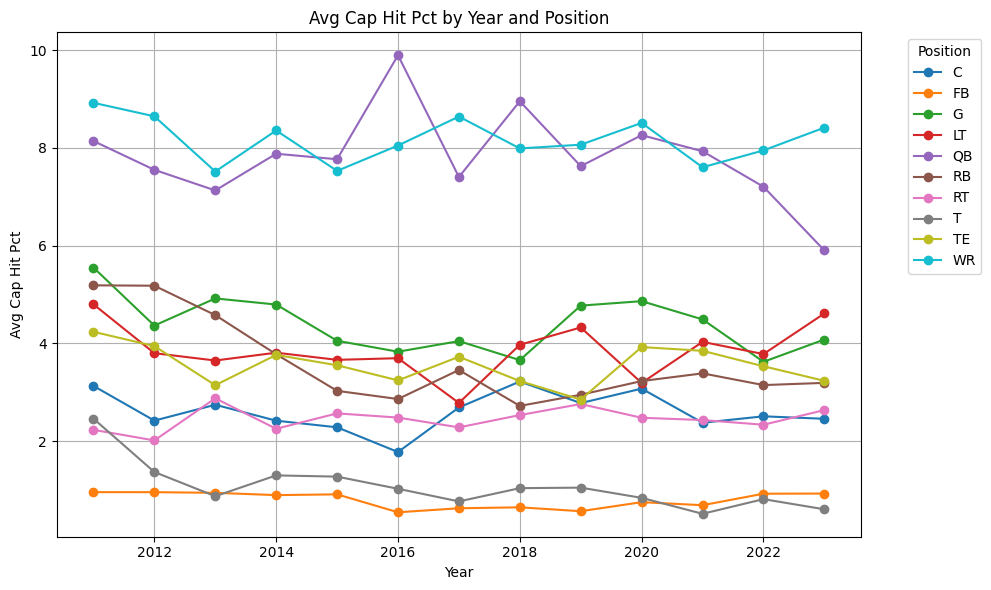

In [49]:
# Plot for offense
plot_cap_hit_pct(offense, 'Offense')

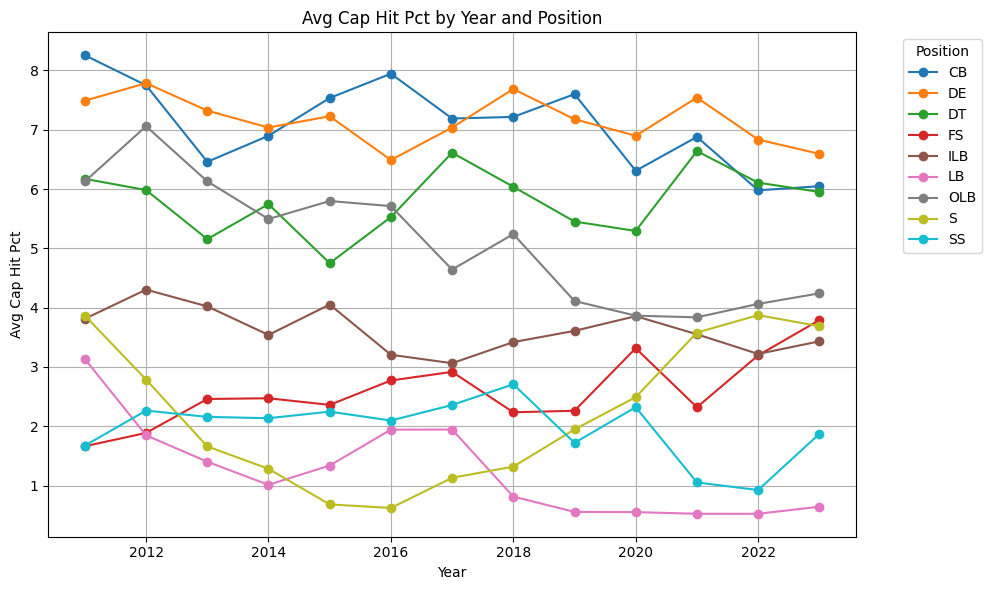

In [50]:
# Plot for defense
plot_cap_hit_pct(defense, 'Defense')

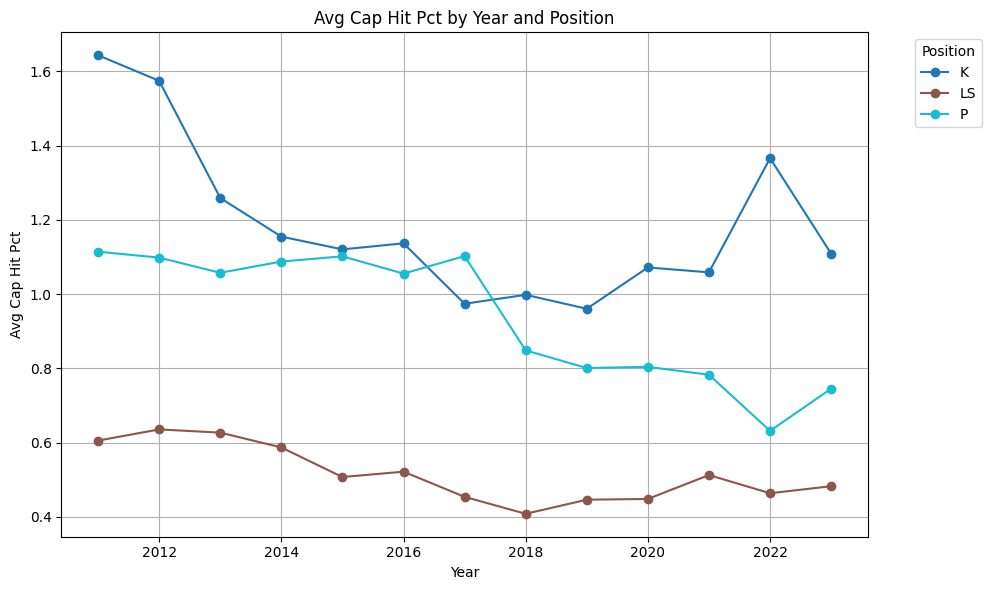

In [51]:
# Plot for special teams
plot_cap_hit_pct(spec_teams, 'Special Teams')

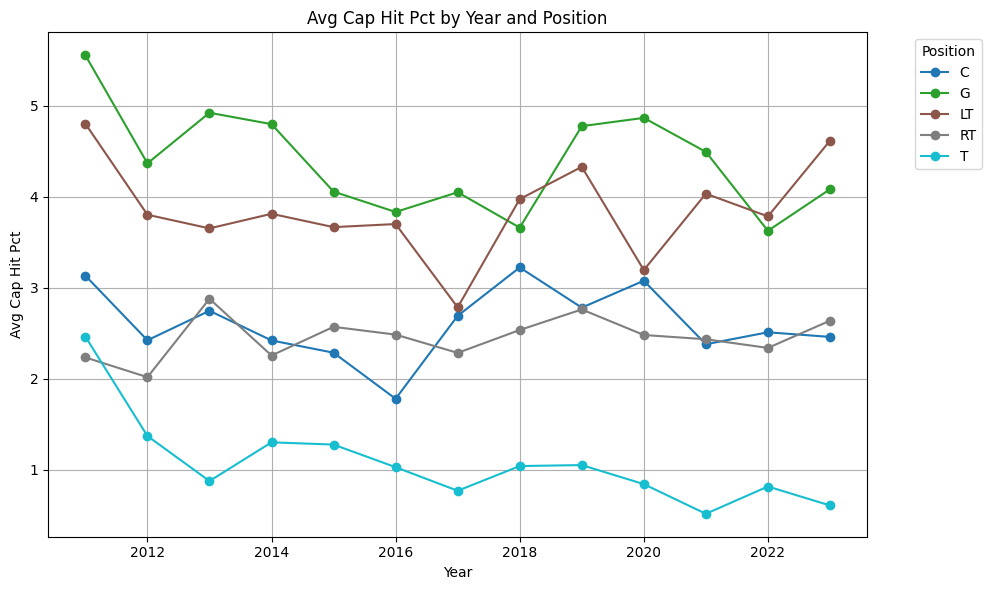

In [52]:
# Plot for offensive line
plot_cap_hit_pct(oline, 'Offensive Line')

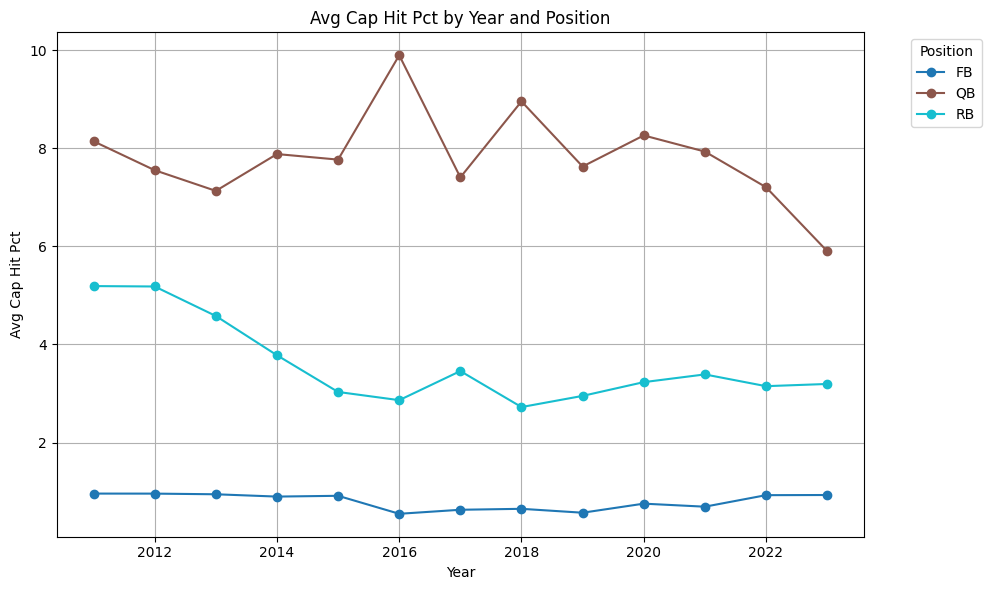

In [53]:
# Plot for backfield
plot_cap_hit_pct(backfield, 'Backfield')

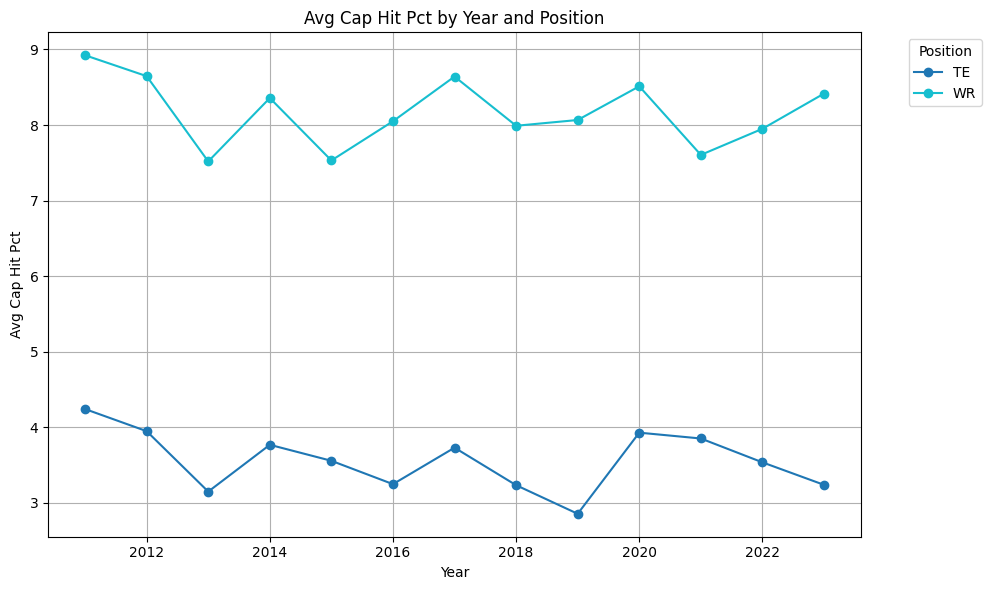

In [54]:
# Plot for pass catchers
plot_cap_hit_pct(pass_catch, 'Pass Catchers')

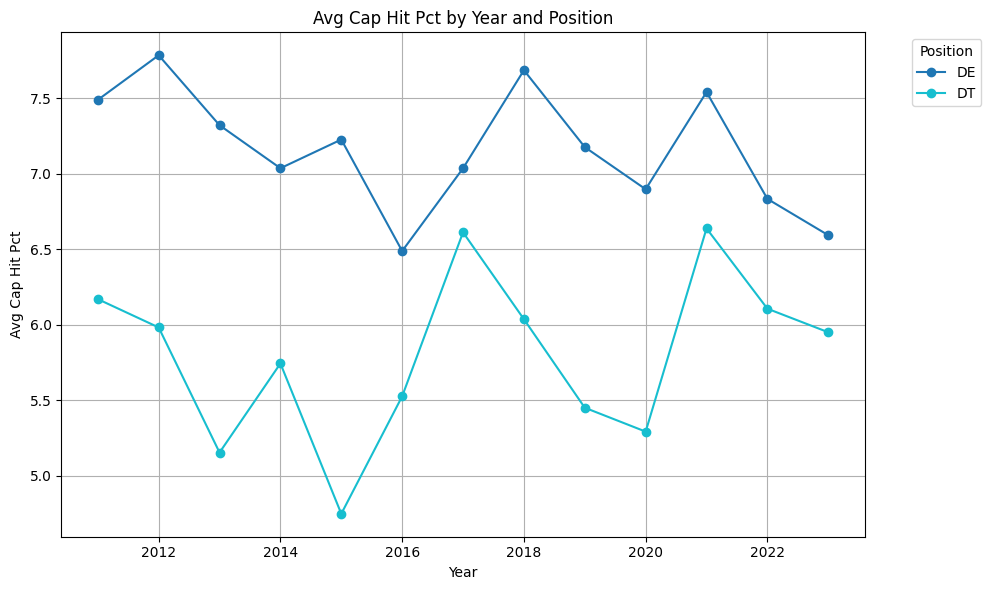

In [55]:
# Plot for defensive line
plot_cap_hit_pct(dline, 'Defensive Line')

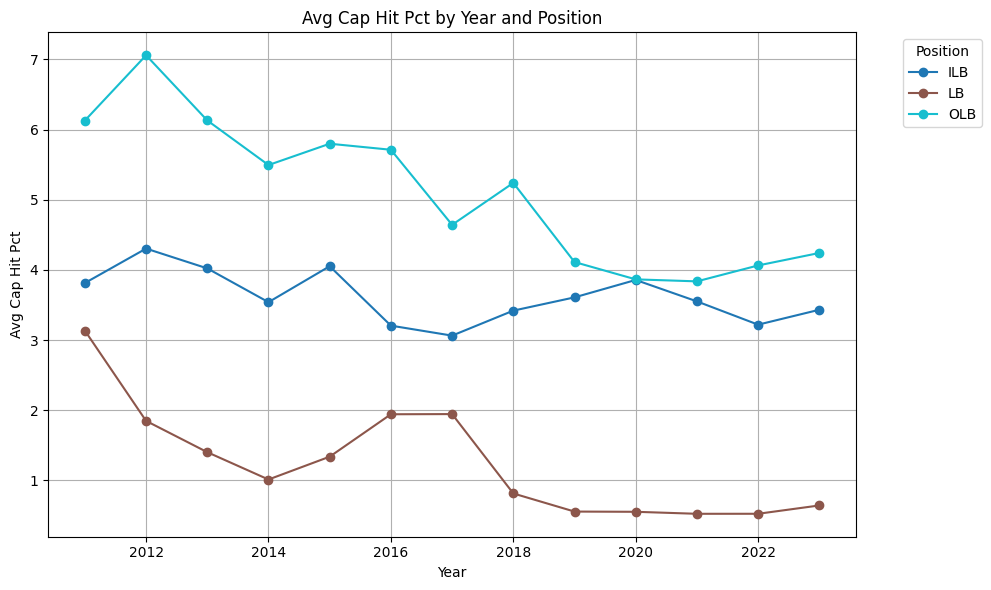

In [56]:
# Plot for linebackers
plot_cap_hit_pct(backer, 'Linebackers')

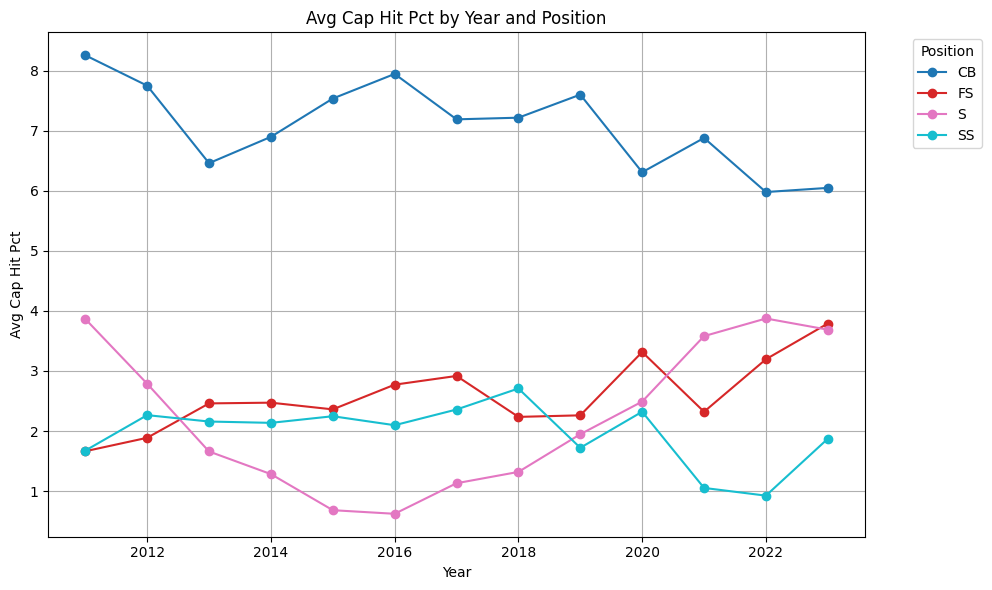

In [57]:
# Plot for secondary
plot_cap_hit_pct(secondary, 'Secondary')

In [58]:
# Merge the datasets on 'year' and 'team'
merged_data = pd.merge(filtered_stats, pos_salaries, on=['year', 'team'])

merged_data.head()

,year,team,win_loss_perc,made_playoffs,playoff_wins,sb_wins,pos,cap_hit_pct
0,2011,Patriots,0.813,1,2,0,C,4.57
1,2011,Patriots,0.813,1,2,0,CB,3.66
2,2011,Patriots,0.813,1,2,0,DE,5.53
3,2011,Patriots,0.813,1,2,0,DT,9.12
4,2011,Patriots,0.813,1,2,0,FS,2.94


In [59]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8060 entries, 0 to 8059
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           8060 non-null   int64  
 1   team           8060 non-null   object 
 2   win_loss_perc  8060 non-null   float64
 3   made_playoffs  8060 non-null   int64  
 4   playoff_wins   8060 non-null   int64  
 5   sb_wins        8060 non-null   int64  
 6   pos            8060 non-null   object 
 7   cap_hit_pct    8060 non-null   float64
dtypes: float64(2), int64(4), object(2)
memory usage: 566.7+ KB


In [60]:
# Calculate average cap hit percentage by year, team, and position
merged_avg_cap_hit_pct = merged_data.groupby(['year', 'team', 'pos'])['cap_hit_pct'].mean().reset_index()

merged_avg_cap_hit_pct.head()

,year,team,pos,cap_hit_pct
0,2011,49Ers,C,2.22
1,2011,49Ers,CB,8.74
2,2011,49Ers,DE,9.29
3,2011,49Ers,DT,6.49
4,2011,49Ers,FB,0.66


In [61]:
merged_avg_cap_hit_pct.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8060 entries, 0 to 8059
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   year         8060 non-null   int64  
 1   team         8060 non-null   object 
 2   pos          8060 non-null   object 
 3   cap_hit_pct  8060 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 252.0+ KB


In [62]:
# Merge the average cap hit percentage data with the filtered_stats DataFrame
analysis_data = pd.merge(filtered_stats, merged_avg_cap_hit_pct, on=['year', 'team'])

analysis_data.head()

,year,team,win_loss_perc,made_playoffs,playoff_wins,sb_wins,pos,cap_hit_pct
0,2011,Patriots,0.813,1,2,0,C,4.57
1,2011,Patriots,0.813,1,2,0,CB,3.66
2,2011,Patriots,0.813,1,2,0,DE,5.53
3,2011,Patriots,0.813,1,2,0,DT,9.12
4,2011,Patriots,0.813,1,2,0,FS,2.94


In [63]:
analysis_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8060 entries, 0 to 8059
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           8060 non-null   int64  
 1   team           8060 non-null   object 
 2   win_loss_perc  8060 non-null   float64
 3   made_playoffs  8060 non-null   int64  
 4   playoff_wins   8060 non-null   int64  
 5   sb_wins        8060 non-null   int64  
 6   pos            8060 non-null   object 
 7   cap_hit_pct    8060 non-null   float64
dtypes: float64(2), int64(4), object(2)
memory usage: 566.7+ KB


In [64]:
# Analyze the relationship between cap hit percentages and win/loss percentage
win_loss_correlation = analysis_data.pivot_table(
    index=['year', 'team'], columns='pos', values='cap_hit_pct').corrwith(analysis_data.set_index(['year', 'team'])['win_loss_perc']
)

# Sort the correlation values from greatest to least
wl_corr_sorted = win_loss_correlation.sort_values(ascending=False)

print(wl_corr_sorted)

pos
QB     0.243244
WR     0.218367
SS     0.202673
DE     0.190193
S      0.131140
TE     0.130624
ILB    0.119936
FS     0.108293
C      0.107885
LT     0.103043
CB     0.099279
RT     0.097748
OLB    0.095266
DT     0.089791
K      0.080623
RB     0.067088
T      0.046829
P      0.044220
LB     0.033955
FB     0.013845
LS     0.002876
G     -0.003814
dtype: float64


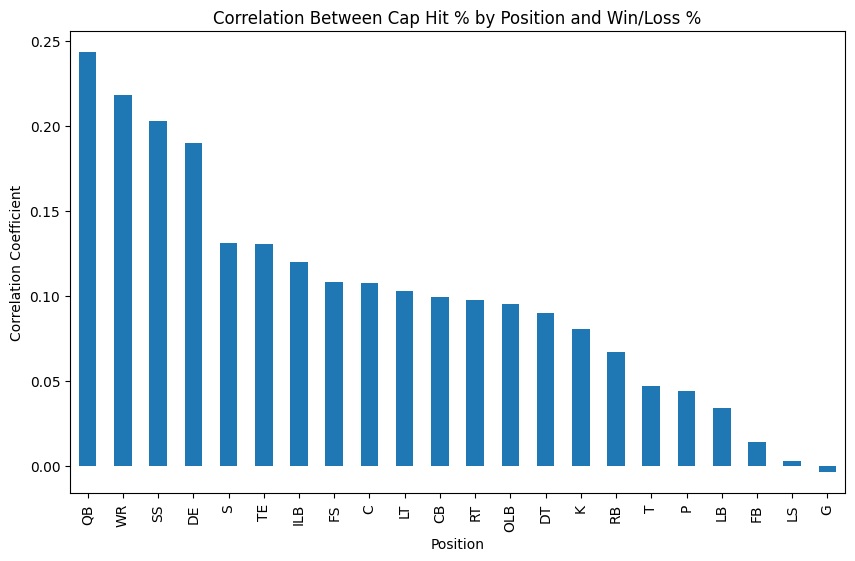

In [65]:
# Plot the correlation resutls
wl_corr_sorted.plot(kind='bar', figsize=(10,6), title='Correlation Between Cap Hit % by Position and Win/Loss %')
plt.xlabel('Position')
plt.ylabel('Correlation Coefficient')
plt.show()

In [66]:
# Analyze the relationship between cap hit percentages and playoff wins
playoff_win_correlation = analysis_data.pivot_table(
    index=['year', 'team'], columns='pos', values='cap_hit_pct').corrwith(analysis_data.set_index(['year', 'team'])['playoff_wins']
)

# Sort the correlation values from greatest to least
pw_corr_sorted = playoff_win_correlation.sort_values(ascending=False)

print(pw_corr_sorted)

pos
S      0.152662
SS     0.149217
QB     0.148122
DT     0.147006
TE     0.117424
DE     0.096714
RT     0.075421
FB     0.071902
WR     0.071645
K      0.069486
ILB    0.055411
FS     0.052606
P      0.050265
LB     0.049766
C      0.039877
LT     0.039356
RB     0.034205
G     -0.012983
OLB   -0.017499
T     -0.046351
CB    -0.052233
LS    -0.056473
dtype: float64


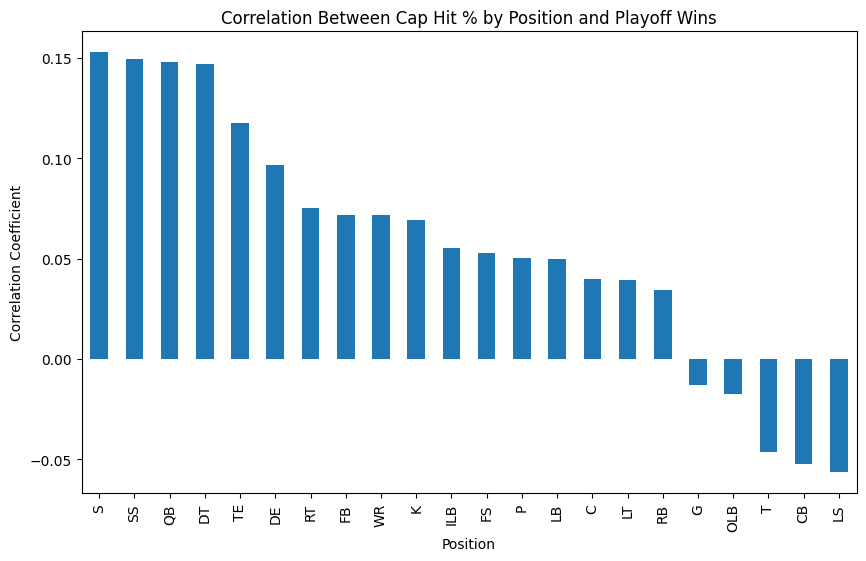

In [67]:
# Plot the correlation resutls
pw_corr_sorted.plot(kind='bar', figsize=(10,6), title='Correlation Between Cap Hit % by Position and Playoff Wins')
plt.xlabel('Position')
plt.ylabel('Correlation Coefficient')
plt.show()

In [68]:
# Analyze the relationship between cap hit percentages and superbowl wins
sb_correlation = analysis_data.pivot_table(
    index=['year', 'team'], columns='pos', values='cap_hit_pct').corrwith(analysis_data.set_index(['year', 'team'])['sb_wins']
)

# Sort the correlation values from greatest to least
sb_corr_sorted = sb_correlation.sort_values(ascending=False)

print(sb_corr_sorted)

pos
FS     0.104530
QB     0.098844
TE     0.098655
RT     0.094986
DT     0.070920
S      0.069447
SS     0.066998
LB     0.066563
P      0.060285
LT     0.046940
DE     0.046204
WR     0.038299
FB     0.026669
K      0.013738
G      0.008483
RB     0.005724
OLB   -0.001215
LS    -0.005672
T     -0.009505
ILB   -0.023901
C     -0.047573
CB    -0.062913
dtype: float64


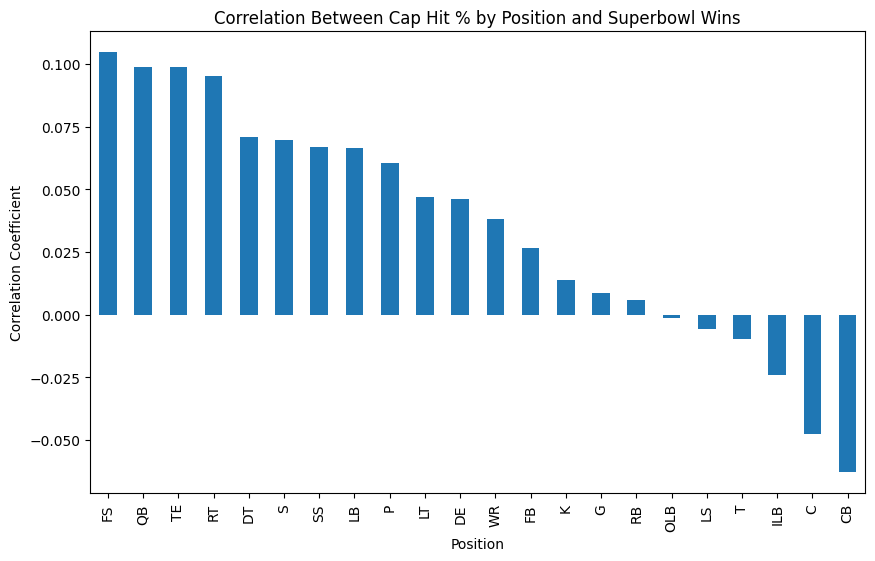

In [69]:
# Plot the correlation resutls
sb_corr_sorted.plot(kind='bar', figsize=(10,6), title='Correlation Between Cap Hit % by Position and Superbowl Wins')
plt.xlabel('Position')
plt.ylabel('Correlation Coefficient')
plt.show()